# Fine-mappping of selected SNPs using CLUES

In [ ]:
Do that for s = (s that where fixation time / 2 equals 10000 years) Then estimate ECH properties)
I.e. solve fixation time formula for s using sympy…




In [2]:
import numpy as np
import pandas
np.random.seed(7)

In [3]:
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set() # sets seaborn default "prettyness:
sns.set_style("whitegrid")
sns.set_context("paper")

/home/kmt/anaconda3/envs/simons/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Running CLUES

I run CLUES on the WestEurasian individuals.

The results analyzed in this notebook are produced by `workflow_clues.py`. However, liftover is done using a separate workflow: [liftover-gwf-workflow](ithub.com/kaspermunch/liftover-gwf-workflow). Also, because GWF needs all its targes specified before runtime, I needed a utilty to to extract information about SNPS sampled for clues analysis. To do that I compiled information about SNPs in the relavant individuals using `compile_clues_snp_info.py`, which produces `steps/clues/derived_freq_info_WestEurasia.h5`.

It outline, this is how results are produced:

ARGwaver:

- Demography: I use the Tennessen_fine demography for CEU. 
- Recombination map: I use the new decode recombination map. I lifted from hg38 to hg19 coordinates. Mapping may induce small holes or overlaps in the lifted map. So I when I extract the relevant intervals from the lifted recombination map, I compute the average rates in 10kb windows (weighted by interval length). That also serve to make ARGWeaver run a bit faster. If 10kb windows are covered segments corresponding to less than half the window, then the mean across all other windows is assumed.
- Burnin and sampling: 
- Window size: 

CLUES:

- Transition probabilities: 
- Flanks: 
- SNP selection: 

## Selection theory

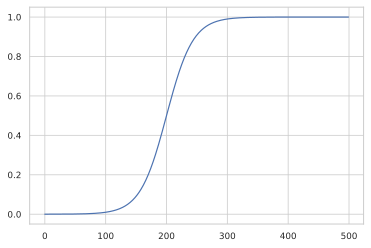

In [24]:
def haploid_trajectory(t, s, p):
    return p / (p + (1-s)**t * (1-p))

plt.plot([haploid_trajectory(x, 0.045, 0.0001) for x in range(500)])
plt.show()

In [15]:
def generation_at_freq(s, freq):
    for g in range(1000):
        f = haploid_trajectory(g, s, 0.01)
        if f > freq:
            return g

for s in [0.02, 0.03, 0.04, 0.05, 0.1]:
    print(s, generation_at_freq(s, 0.99))

0.02 455
0.03 302
0.04 226
0.05 180
0.1 88


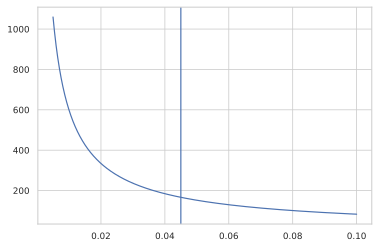

In [32]:
def fixation_time(s, N):
    return (1/s)*np.log(4*N*s) 
    
s_arr = np.linspace(0.005, 0.1, num=10000)
plt.plot(s_arr, fixation_time(s_arr, 10000))
plt.axvline(0.045)
plt.show()

In [3]:
344 * 29

9976

In [8]:
import sympy as sym

from IPython.display import Math, Markdown
from sympy.interactive import printing

sym.init_printing()

In [9]:
# def display_equations(equations):
#     for eqn in equations:
#         display(eqn)

# def display_solutions(left, right):
#     if not type(right) is list:
#         right = [right]
#     for i, sol in enumerate(right):
#         if i > 0:
#             display(Markdown('---'))
#         for a, b in zip(left, sol):
#             display(Math("{} = {}".format(printing.default_latex(a), printing.default_latex(b))))

# def pretty_solve(equations, variables):
#     solutions = sym.solve(equations, variables)
#     display_solutions(variables, solutions)

In [10]:
a, b, c, d, p, S1, S2, D1, D2, T1, T2, theta1, theta2 \
    = sym.symbols('a, b, c, d, p, S1, S2, D1, D2, T1, T2, theta1, theta2')

# a = sym.refine(a, sym.Q.nonzero(a) & sym.Q.positive(a))
# b = sym.refine(b, sym.Q.nonzero(b) & sym.Q.positive(b))
# c = sym.refine(c, sym.Q.nonzero(c) & sym.Q.positive(c))
# d = sym.refine(d, sym.Q.nonzero(d) & sym.Q.positive(d))
# p = sym.refine(p, sym.Q.nonzero(p) & sym.Q.positive(p))
# S1 = sym.refine(S1, sym.Q.nonzero(S1) & sym.Q.positive(S1))
# S2 = sym.refine(S2, sym.Q.nonzero(S2) & sym.Q.positive(S2))
# D1 = sym.refine(D1, sym.Q.nonzero(D1) & sym.Q.positive(D1))
# D2 = sym.refine(D2, sym.Q.nonzero(D2) & sym.Q.positive(D2))
# T1 = sym.refine(T1, sym.Q.nonzero(T1) & sym.Q.positive(T1))
# T2 = sym.refine(T2, sym.Q.nonzero(T2) & sym.Q.positive(T2))
# theta1 = sym.refine(theta1, sym.Q.nonzero(theta1) & sym.Q.positive(theta1))
# theta2 = sym.refine(theta2, sym.Q.nonzero(theta2) & sym.Q.positive(theta2))

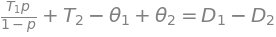

In [11]:
eqn = sym.Eq(T2 - a + b, (D1 - D2))
eqn = eqn.subs(a, theta1 - (T1 * p)/(1-p)).subs(b, theta2)
eqn

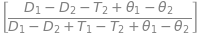

In [13]:
p_expr = sym.solve(eqn, p)
assert len(p_expr) == 1
p_expr

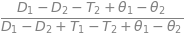

In [12]:
p_expr = p_expr[0]
p_expr

In [14]:
for s, g in zip(s_arr, fixation_time(s_arr, 1000)):
    if g < 344:
        print(s, g)
        break

0.011004600460046005 343.91141994371463
